# HealthCare: Stroke Prediction Problem


# Objective:
Predict whether a Patient will have stroke or not, according to the data given.

# Meaning of the column variables

id-Patient ID

gender-Gender of Patient

age-Age of Patient

hypertension-0 - no hypertension, 1 - suffering from hypertension

heart_disease-0 - no heart disease, 1 - suffering from heart disease

ever_married-Yes/No

work_type-Type of occupation

Residence_type-Area type of residence (Urban/ Rural)

avg_glucose_level-Average Glucose level (measured after meal)

bmi-Body mass index

smoking_status-patient’s smoking status

stroke-0 - no stroke, 1 - suffered stroke

Lets start by loading the Train data and final Test data on which I submitted the results

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Set-Up Complete')

Set-Up Complete


In [28]:
# Reading the data

train_file = 'train_2v.csv'
test_file = 'test_2v.csv'
X_train_file = pd.read_csv(train_file, index_col='id')
X_test_full = pd.read_csv(test_file, index_col='id')

In [29]:
# Viewing the data in pandas

X_train_file.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [30]:
X_train_file.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


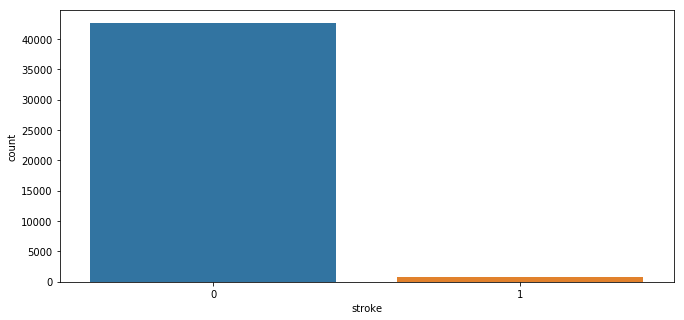

In [31]:
plt.figure(figsize=(11,5))
sns.countplot('stroke',data=X_train_file)

### The above plot shows the non-relational features between people with stroke and those without it, based on the predictors. Less than 5000 people out of 43400 sample individuals has a stroke. This renders the dataset an imbalance dataset.

In [32]:
# Showing the number of both rows and columns respectively

X_train_file.shape

(43400, 11)

In [60]:
X_train_full((X_train_full['stroke'] == 1) & (X_train_full['age'] > '50')).count()

TypeError: invalid type comparison

## In order to make a more balanced dataset, we adjust the number of samples given for the stroke column

In [33]:
shuffled_data = X_train_file.sample(frac=1,random_state=4)

In [34]:
has_stroke_df = X_train_file.loc[X_train_file['stroke'] == 1]

In [35]:
has_no_stroke_df = X_train_file.loc[X_train_file['stroke'] == 0].sample(n= 9800,random_state= 101)

In [36]:
X_train_full = pd.concat([has_stroke_df, has_no_stroke_df])

In [37]:
X_train_full.shape

(10583, 11)

## This has reduced the number of rows given for every column to 10583 rows (in a more appropriate manner)

In [38]:
# Number of missing values in column of training data 

missing_value_in_column = (X_train_full.isnull().sum())
missing_value_in_column[missing_value_in_column > 0]

bmi                467
smoking_status    3198
dtype: int64

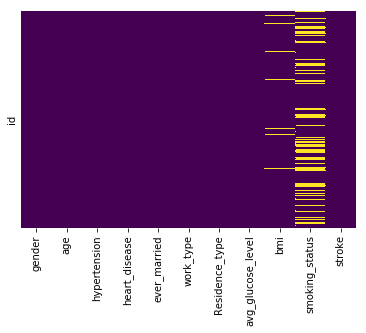

In [39]:
# Visualizing the missing entries
sns.heatmap(X_train_full.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [40]:
# There're relatively much missing entries in the smoking status data with more than 20% of it's entries.
# So dropping it won't be a bad thing to do. As filling in the missing values might result to more inaccurate predictions.
# Dropping smoking status column and seperating targets from predictors

X_train_full.drop(['smoking_status'], axis=1 , inplace = True)

In [41]:
# Next we fill up the missing entries in the 'bmi' column with its mean

X_train_full['bmi'] = X_train_full['bmi'].fillna((X_train_full['bmi'].mean()))

In [42]:
X_train_full.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

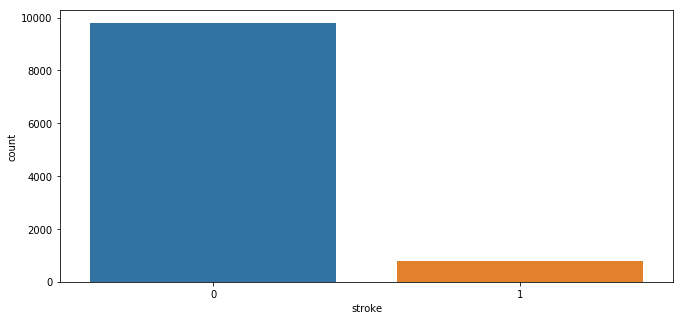

In [43]:
plt.figure(figsize=(11,5))
sns.countplot('stroke',data=X_train_full)

# After re-sampling the dataset, it was observed that less than 2000 people has a stroke out of 10583 individuals entries picked

In [19]:
# Setting the entire predictors to X, and the target variable to y
X = X_train_full.drop(['stroke'], axis=1)
y = X_train_full.stroke

In [20]:
object_cols = [col for col in X.columns if X[col].dtype == 'object']
print(object_cols)

['gender', 'ever_married', 'work_type', 'Residence_type']


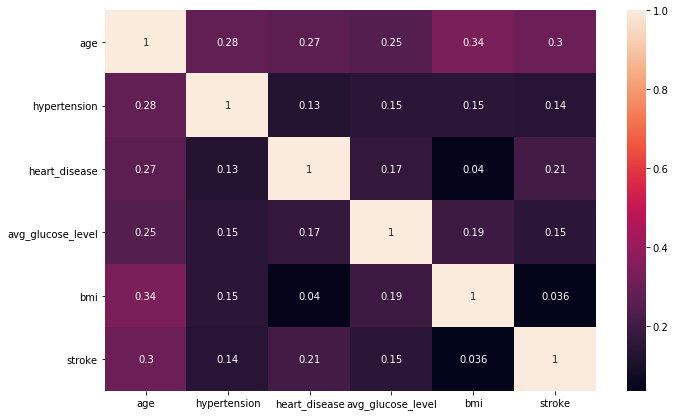

In [21]:
# Showing possible correlations
plt.figure(figsize=(11,7))
sns.heatmap(X_train_full.corr(),annot=True)


<Figure size 648x864 with 0 Axes>

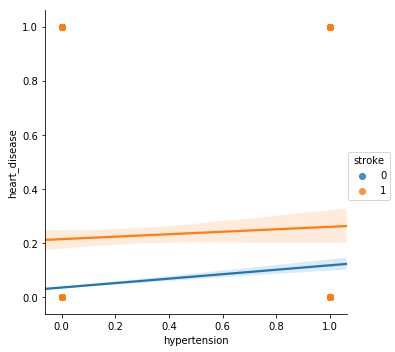

In [22]:
plt.figure(figsize=(9,12))
sns.lmplot(x='hypertension',y='heart_disease',data=X_train_full,hue='stroke')

Here, we see that both slopes are slightly positive, we can say fewer people with a heart disease condition are very likely to have a stroke with an increment in their hypertensive condition. One thing to note is that this data is imbalance despite re-sampling it, we shouldn't invest too much in these patterns. A more balanced dataset would achieve a great result.

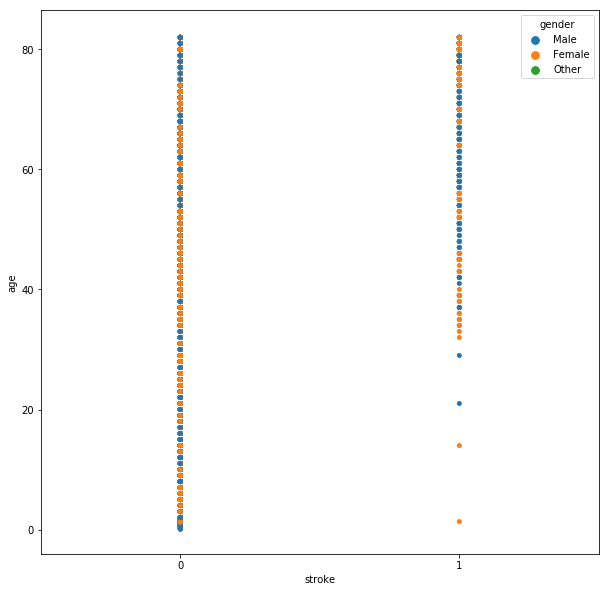

In [23]:
plt.figure(figsize=(10,10))
sns.stripplot(x='stroke', y='age', hue='gender',data = X_train_full)

The stripplot above shows the ages of individual at a certain age who has stroke. This shows that majority of males and females who suffered stroke are above age 25. However, the feature 'Other' indicates people who were sampled but didn't identify themselves with their gender. 

## Using countplot for a better visualization

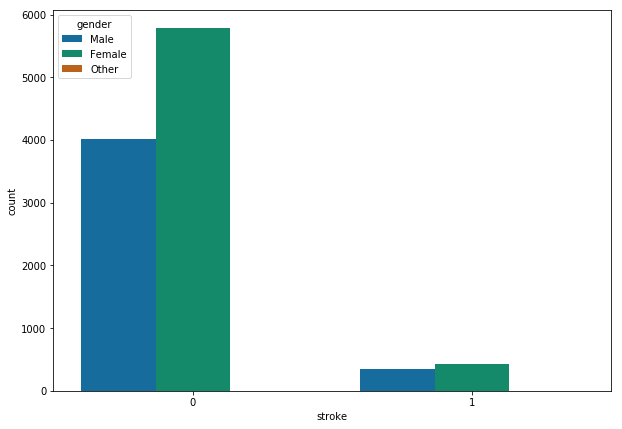

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', hue = 'gender', data = X_train_full, palette = 'colorblind')

## The countplot above shows that slightly more females were recorded to suffer stroke than the males

# Next, Let's check for correlation for ever_married, work_type and Residence_type on the stroke variable

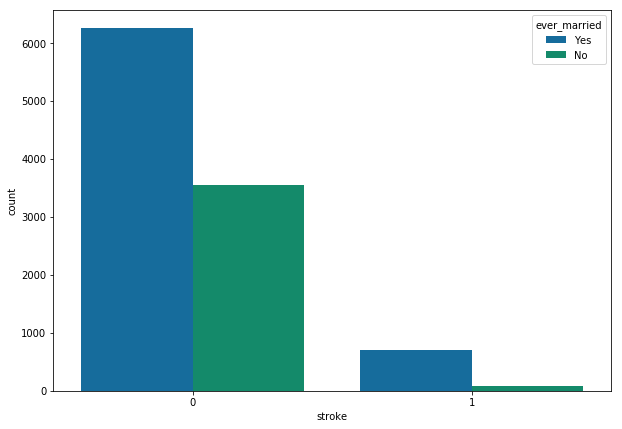

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', hue = 'ever_married', data = X_train_full, palette = 'colorblind')

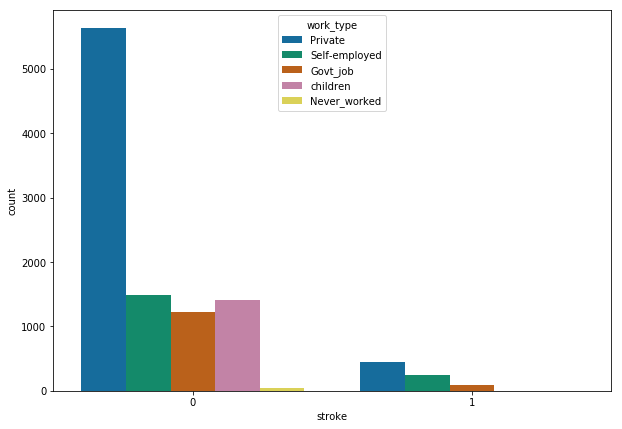

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', hue = 'work_type', data = X_train_full, palette = 'colorblind')

As expected, children are mostly those with 'never worked' record and suffer no stroke. However, individuals who work in a private company suffer stroke more than individuals with their personal business and much more that those who even work in government parastatals suffer stroke

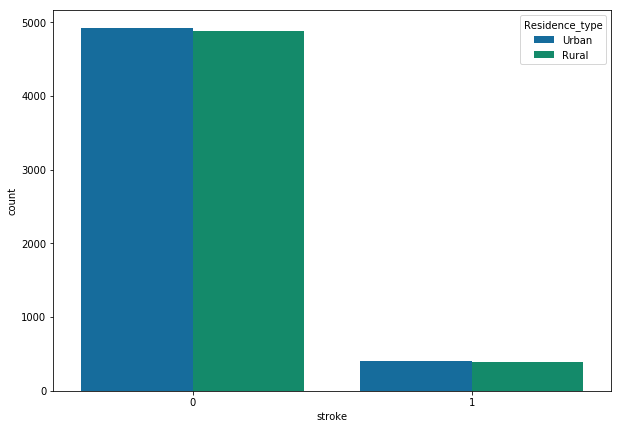

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', hue = 'Residence_type', data = X_train_full, palette = 'colorblind')

1HE

In [27]:
from sklearn.model_selection import train_test_split
# Breaking off validation set from training data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state= 101)

In [28]:
# Checking for cardinality of categorical variables
print(X.nunique())

#Looking closely, we have predictors with about tens of thousands features,
# so we drop those with features greater than five(5)
usable_column_feature = [col for col in object_cols if set(X_train[col]) == set(X_valid[col])]
unusable_high_column_feature = list(set(object_cols) - set(usable_column_feature))
print(usable_column_feature)
print(unusable_high_column_feature)

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    6561
bmi                   464
dtype: int64
['gender', 'ever_married', 'work_type', 'Residence_type']
[]


Applying one-hot encoding

In [29]:
# Applying one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
my_1HE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_train = pd.DataFrame(my_1HE.fit_transform(X_train[usable_column_feature]))
OH_valid = pd.DataFrame(my_1HE.transform(X_valid[usable_column_feature]))

#OneHotEncoding removed index during its application, so we put it back
OH_train.index = X_train.index
OH_valid.index = X_valid.index

In [30]:
# Removing categorical columns from dataset

numerical_X_train = X_train.drop(object_cols, axis=1)
numerical_X_valid = X_valid.drop(object_cols, axis=1)

In [31]:
#  Replacing categorical columns with their OneHotEncoded counterparts

final_X_train = pd.concat([OH_train,numerical_X_train], axis=1)
final_X_valid = pd.concat([OH_valid ,numerical_X_valid], axis=1)

Applying LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
my_model=LogisticRegression()
my_model.fit(final_X_train,y_train)
my_pred = my_model.predict(final_X_valid)
print('MAE:{:,.4f}'.format(mean_absolute_error(y_valid,my_pred)))
print('MSE:{:,.4f}'.format(mean_squared_error(y_valid,my_pred)))
print('RMSE:{:,.4f}'.format(np.sqrt(mean_squared_error(y_valid,my_pred))))

MAE:0.0797
MSE:0.0797
RMSE:0.2823


C:\Users\Wey P\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Apparently, the model with LogisticRegression has fewer MAE than RandomForestRegressor

Next, Lets check for their classification_report, score, confusion matrix and accuracy

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,my_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2929
           1       0.23      0.01      0.02       246

    accuracy                           0.92      3175
   macro avg       0.58      0.50      0.49      3175
weighted avg       0.87      0.92      0.89      3175



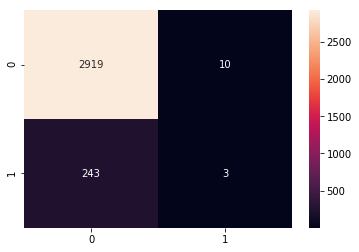

In [34]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_valid,my_pred)
sns.heatmap(confusion,annot=True,fmt='d')

In [35]:
from sklearn.metrics import accuracy_score

print('Accuracy = {:,.2f}%'.format(accuracy_score(y_valid,my_pred) * 100))

Accuracy = 92.03%
